<h2 align="center"> Univariate Linear Regression with Numpy and Python </h2>

### Task 1: Load the Data and Libraries

In [6]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot') #Explicit Plot Styling 
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
data = pd.read_csv("bike_sharing_data.txt")

### Taking a look at the Data

In [15]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## The Data represents Population (x10000) and Profit (x10000$)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


#### The Population represents the population of each city in the dataset
#### Profit represents the profit that the company makes in each city

### Task 3: Visualize the Data
---

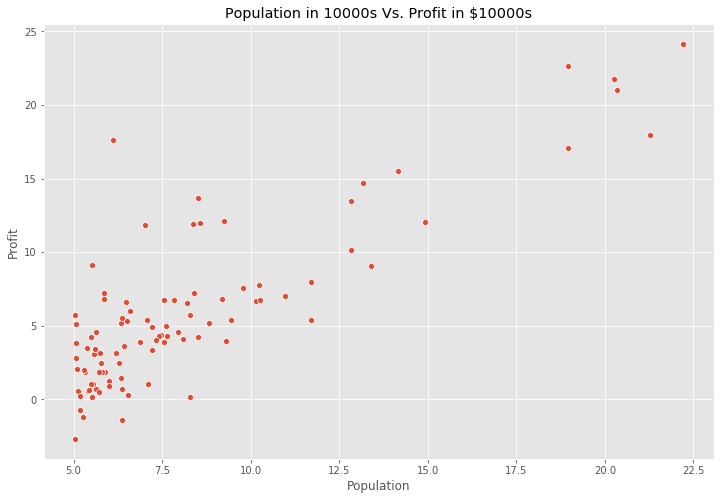

In [27]:
plot = sns.scatterplot(x = "Population" , y = "Profit" , data = data)
plot.set_title("Population in 10000s Vs. Profit in $10000s");

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [66]:
def cost_function (weights , X, Y) :
    true_values = Y
    predicted = X @ weights
    error = (predicted - true_values) ** 2
    cost = np.sum(error)/ (2*len(Y))
    
    return(cost)

### Validating the Cost Function
---

In [72]:
m = data.Population.values.size     # m = number of points in dataset 

In [73]:
X = np.append(np.ones((m,1)) , data.Population.values.reshape(m,1) , axis = 1)     #Adding the intercept term = 1
Y = data.Profit.values.reshape(m,1)
weights = np.zeros((2,1))     #As we use 2 features for prediction "Intercept" and "Population"

In [74]:
cost_function(weights, X, Y)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [83]:
Y.shape

(97, 1)

In [88]:
def gradient_descent(X,  Y, weights, step_size , iterations) :
    m = len(Y)     # m = number of datasets
    
    costs = []
    for _ in range(iterations) :
        predicted = X @ weights
        error = predicted - Y
        shift = (step_size / m) * (X.T @ error)
        weights -= shift
        costs.append(cost_function(weights, X, Y))
        
    return weights, costs

In [89]:
final_wts , costs = gradient_descent(X, Y, weights, step_size = 0.01, iterations = 2000)

### Representation of the Learned Model

In [98]:
print("Model = {}*(intercept) + {}*(Population)".format(final_wts[0][0] , final_wts[1][0]) )

Model = -3.78806857272311*(intercept) + 1.1822127747573767*(Population)


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [101]:
from mpl_toolkits.mplot3d import Axes3D

In [119]:
weight_0 = np.linspace(-10,10, 100)
weight_1 = np.linspace(-1,4, 100)

In [120]:
cost_values = np.zeros((len(weight_0) , len(weight_1)))     #Generating a 2D array of Cost_Values at the possible values of weight_0 and weight_1

In [128]:
for i in range(len(weight_0)) :
    for j in range(len(weight_1)) :
        assoc_weights = np.array([weight_0[i] , weight_1[j]])
        cost_values[i][j] = cost_function(assoc_weights, X, Y)

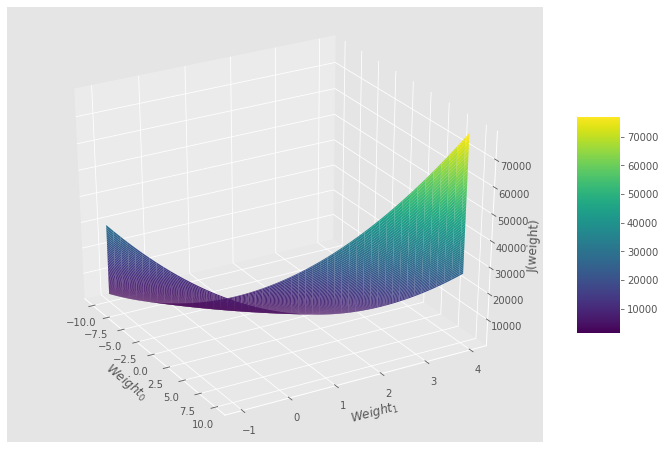

In [129]:
fig = plt.figure(figsize = (12,8)) 
ax = fig.gca(projection = "3d")

surf = ax.plot_surface(weight_0, weight_1 , cost_values, cmap = "viridis")
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$Weight_0$")
plt.ylabel("$Weight_1$")
ax.set_zlabel("J(weight)")
ax.view_init(30, 330)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 8: Training Data with Linear Regression Fit
---

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$